# Prospecção de Dados 2021/2022

**Alunos:**
    Pedro Oliveira (52754), Rodrigo Ferreira (51032), Rui Roque (57588)

## Fourth Home Assignment

Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.cluster import silhouette_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.cluster import calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from google.colab import files

### Carregamento dos dados selecionando a coluna Date Time como índice

In [2]:
df = pd.read_csv("Weather_Jena/jena_climate_2009_2016.csv", index_col="Date Time")
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Alteração dos valores do índice para datetime:

In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Segundo esta tabela é possível verificar que será necessário fazer uma estandardização no conjunto de dados pois existe uma grande diferença de valores em cada feature.

<br>

## 1. Objetivo 1 - Clusters dos dados ao meio-dia e à meia-noite
### 1.1 Seleção dos dados ao meio-dia

In [5]:
noon_df = df.at_time("12:00:00")
noon_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
2009-02-01 12:00:00,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
2009-03-01 12:00:00,999.02,-5.96,267.28,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90
2009-04-01 12:00:00,988.94,-1.21,272.82,-2.36,91.8,5.59,5.13,0.46,3.23,5.19,1264.30,1.99,3.88,225.80
2009-05-01 12:00:00,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27 12:00:00,1006.57,5.78,278.42,0.84,70.4,9.22,6.49,2.73,4.02,6.45,1253.99,3.42,7.19,264.50
2016-12-28 12:00:00,1014.16,6.16,278.20,3.03,80.3,9.46,7.60,1.86,4.67,7.49,1261.25,2.31,3.71,271.20
2016-12-29 12:00:00,1014.72,3.49,275.50,2.24,91.5,7.85,7.18,0.67,4.41,7.08,1274.32,0.84,1.80,36.99


### Pré-Processamento dos dados

Inicialmente foi feita a conversão do dataframe para array:

In [6]:
nc = noon_df.shape[1]
df_array = noon_df.values
X = df_array[:, :]
feature_names = noon_df.columns.values[:]

print(feature_names)

['p (mbar)' 'T (degC)' 'Tpot (K)' 'Tdew (degC)' 'rh (%)' 'VPmax (mbar)'
 'VPact (mbar)' 'VPdef (mbar)' 'sh (g/kg)' 'H2OC (mmol/mol)'
 'rho (g/m**3)' 'wv (m/s)' 'max. wv (m/s)' 'wd (deg)']


De seguida foi feita a estandardização dos dados:

In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
 
X_scaled

array([[ 1.29995321e+00, -2.09963224e+00, -2.18527168e+00, ...,
         1.25568002e-02,  5.89126568e-03,  1.86598133e-01],
       [ 1.13449786e+00, -1.67537958e+00, -1.75168090e+00, ...,
         1.09355211e-02,  2.48744096e-03, -4.65861729e-01],
       [ 1.14759145e+00, -1.99668026e+00, -2.07181917e+00, ...,
         9.69254047e-03,  1.83909340e-03,  5.21921582e-01],
       ...,
       [ 3.01640364e+00, -9.27563575e-01, -1.14847300e+00, ...,
         7.15253653e-03,  1.40686169e-03, -1.48899609e+00],
       [ 2.54146347e+00, -1.47060697e+00, -1.65170789e+00, ...,
         8.66573037e-03,  3.26282411e-04,  3.36641168e-01],
       [ 1.83083871e+00, -1.45703089e+00, -1.58655695e+00, ...,
         7.26062181e-03,  1.10166555e-04,  4.91230961e-01]])

### Identificação dos 3 melhores clusters

Inicialmente foi verificado qual o melhor k, através da métrica euclidiana, utilizando o algoritmo kmeans e o método elbow, onde selecionou-se como o menor valor de k, o número de colunas mais um. 

<br>

Para esta verificação foi utilizada a função KElbowVisualizer do pacote YellowBrick que nos indica logo qual o melhor k:

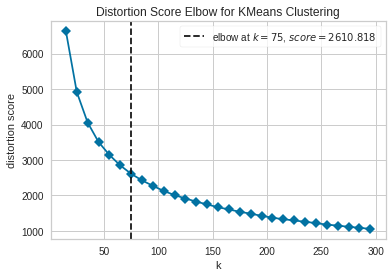

In [10]:
ks = np.arange(15,300, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()    

Já conhecido o melhor valor para k, passou-se para a definição de uma função (utilizando um menor intervalo de valores de k), que calcula para cada algoritmo (HAC, Kmeans e DBSCAN) o número de clusters, os silhouette scores e os calinski scores, retornando um dataframe com toda a informação de cada iteração: 

In [11]:
def best_clusters(X_scaled):
    D = {   "Clusters": [],
            "Algorithm": [],
            "Parameters": [],
            "Silhouette Score": [],
            "Calinski Score": []}

    linkage = ["single", "ward", "complete", "average"]

    for k in np.arange(35, 95, 10):
        kms = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
        sil_k = silhouette_score(X_scaled, kms.labels_)
        cal_k = calinski_harabasz_score(X_scaled, kms.labels_)
        D["Clusters"].append(k)
        D["Algorithm"].append("Kmeans")
        D["Parameters"].append(" ")
        D["Silhouette Score"].append(sil_k)
        D["Calinski Score"].append(cal_k)
        for l in linkage:
            hac = AgglomerativeClustering(linkage=l, n_clusters=k).fit(X_scaled)
            sil_h = silhouette_score(X_scaled, hac.labels_)
            cal_h = calinski_harabasz_score(X_scaled, hac.labels_)
            D["Clusters"].append(k)
            D["Algorithm"].append("HAC")
            D["Parameters"].append(l + " linkage")
            D["Silhouette Score"].append(sil_h)
            D["Calinski Score"].append(cal_h)
        

        
    for eps in np.arange(0.05, 0.8, 0.05):
        for Nmin in np.arange(15, 150, 10):
            dbs = DBSCAN(eps = eps, min_samples=Nmin).fit(X_scaled)
            n_clusts = len(set(dbs.labels_))
            if(n_clusts > 1):
                sil_dbs = silhouette_score(X_scaled, dbs.labels_)
                cal_dbs = calinski_harabasz_score(X_scaled, dbs.labels_)
                D["Clusters"].append(n_clusts)
                D["Algorithm"].append("DBSCAN")
                D["Parameters"].append("eps:{} Nmin:{}".format(eps, Nmin))
                D["Silhouette Score"].append(sil_dbs)
                D["Calinski Score"].append(cal_dbs)


    df_clusters = pd.DataFrame(D)
    return df_clusters

In [12]:
df_clusters = best_clusters(X_scaled)
df_clusters.sort_values( by=['Silhouette Score'],ascending=[False])

,Clusters,Algorithm,Parameters,Silhouette Score,Calinski Score
10,55,Kmeans,,0.206198,641.704529
0,35,Kmeans,,0.202055,767.386725
15,65,Kmeans,,0.200022,599.526106
5,45,Kmeans,,0.199551,694.256159
20,75,Kmeans,,0.199392,562.654101
25,85,Kmeans,,0.198650,534.738910
27,85,HAC,ward linkage,0.158462,472.889113
22,75,HAC,ward linkage,0.155092,494.292098
2,35,HAC,ward linkage,0.150323,653.009168
17,65,HAC,ward linkage,0.147788,520.267565


Segundo estes resultados, selecionámos os índices: 0, 10, 5 como os três melhores clusters deste conjunto de dados.

### Visualização gráfica do silhouette score para os três melhores clusters selecionados:

In [13]:

def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        color = cm.nipy_spectral(i / n_clusters) #np.array(["r", "g", "b", "k", "y"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, facecolor=color, edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()


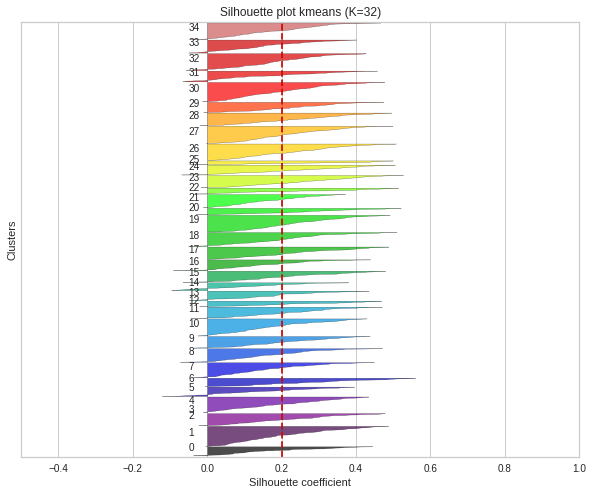

Kmeans silhouette_score 0.2020545515405877


In [14]:
kmeans = KMeans(n_clusters=35, random_state=0).fit(X_scaled)
drawSillouette(X_scaled, kmeans.labels_, "kmeans (K=32)")
print("Kmeans silhouette_score", silhouette_score(X_scaled, kmeans.labels_))


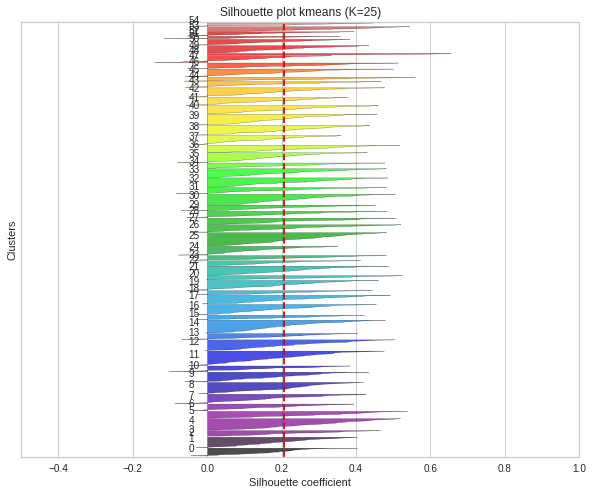

Kmeans silhouette_score 0.20619813467365522


In [15]:
kmeans = KMeans(n_clusters=55, random_state=0).fit(X_scaled)
drawSillouette(X_scaled, kmeans.labels_, "kmeans (K=25)")
print("Kmeans silhouette_score", silhouette_score(X_scaled, kmeans.labels_))

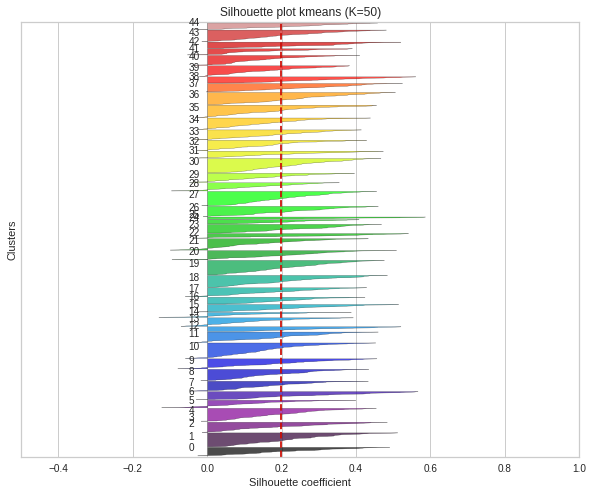

Kmeans silhouette_score 0.19955131601939297


In [16]:
kmeans = KMeans(n_clusters=45, random_state=0).fit(X_scaled)
drawSillouette(X_scaled, kmeans.labels_, "kmeans (K=50)")
print("Kmeans silhouette_score", silhouette_score(X_scaled, kmeans.labels_))


### 1.2 Seleção dos dados à meia-noite



In [17]:
midnight_df = df.at_time("00:00:00")
midnight_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-02-01,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
2009-03-01,1002.32,-4.71,268.27,-6.09,90.0,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
2009-04-01,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
2009-05-01,985.07,-1.47,272.86,-2.45,93.0,5.48,5.10,0.38,3.23,5.18,1260.58,1.42,3.00,239.80
2009-06-01,997.60,-12.63,260.71,-15.07,81.8,2.31,1.89,0.42,1.18,1.89,1332.96,1.60,2.63,355.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,1011.65,6.29,278.53,2.59,77.1,9.55,7.36,2.19,4.54,7.28,1257.65,1.76,4.05,263.50
2016-12-29,1015.17,3.50,275.47,2.10,90.5,7.86,7.11,0.75,4.37,7.00,1274.87,0.57,1.48,169.80
2016-12-30,1012.35,-1.84,270.37,-2.09,98.2,5.33,5.24,0.10,3.22,5.17,1297.28,2.00,2.60,216.90


### Junção da tabela dos dados à meia-noite e ao meio-dia

In [18]:
noon_midnight_df = pd.concat([noon_df, midnight_df])
noon_midnight_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
2009-02-01 12:00:00,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
2009-03-01 12:00:00,999.02,-5.96,267.28,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90
2009-04-01 12:00:00,988.94,-1.21,272.82,-2.36,91.8,5.59,5.13,0.46,3.23,5.19,1264.30,1.99,3.88,225.80
2009-05-01 12:00:00,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28 00:00:00,1011.65,6.29,278.53,2.59,77.1,9.55,7.36,2.19,4.54,7.28,1257.65,1.76,4.05,263.50
2016-12-29 00:00:00,1015.17,3.50,275.47,2.10,90.5,7.86,7.11,0.75,4.37,7.00,1274.87,0.57,1.48,169.80
2016-12-30 00:00:00,1012.35,-1.84,270.37,-2.09,98.2,5.33,5.24,0.10,3.22,5.17,1297.28,2.00,2.60,216.90


### Pré-processamento dos dados

In [19]:
nc = noon_midnight_df.shape[1]
df_array = noon_midnight_df.values
X = df_array[:, :]

feature_names = noon_midnight_df.columns.values[:]

print(feature_names)

['p (mbar)' 'T (degC)' 'Tpot (K)' 'Tdew (degC)' 'rh (%)' 'VPmax (mbar)'
 'VPact (mbar)' 'VPdef (mbar)' 'sh (g/kg)' 'H2OC (mmol/mol)'
 'rho (g/m**3)' 'wv (m/s)' 'max. wv (m/s)' 'wd (deg)']


Estandardização dos dados:

In [20]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
 
X_scaled

array([[ 1.30120731e+00, -1.99952346e+00, -2.08729886e+00, ...,
         9.56896163e-03,  3.87574706e-03,  9.94029623e-02],
       [ 1.13495752e+00, -1.54941813e+00, -1.62808778e+00, ...,
         7.27645501e-03, -9.37274644e-04, -5.73835372e-01],
       [ 1.14811398e+00, -1.89029790e+00, -1.96714259e+00, ...,
         5.51886660e-03, -1.85404068e-03,  4.45405242e-01],
       ...,
       [ 2.74243750e+00, -1.39578218e+00, -1.59953579e+00, ...,
         1.07916318e-02,  3.64655555e-03,  4.80591915e-01],
       [ 2.30229418e+00, -1.66584538e+00, -1.83271033e+00, ...,
         2.92069243e-03, -2.61801238e-03, -7.53575112e-02],
       [ 1.24379731e+00, -1.75346588e+00, -1.83865866e+00, ...,
         4.90753150e-03, -1.24286332e-03,  1.05267408e-01]])

### Verificação do melhor valor k, utilizando o método elbow:

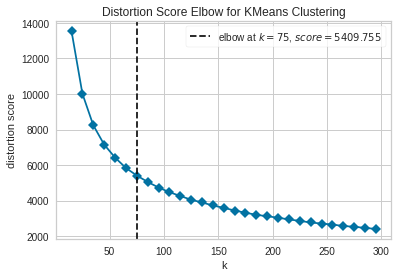

In [21]:
ks = np.arange(15,300, 10)
    
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()    

### Identificação dos 3 melhores clusters

Chamada da função best_clusters já descrita em cima

In [22]:
best_clusters = best_clusters(X_scaled)
best_clusters.sort_values( by=['Silhouette Score'],ascending=[False])

,Clusters,Algorithm,Parameters,Silhouette Score,Calinski Score
0,35,Kmeans,,0.208551,1526.259881
5,45,Kmeans,,0.201888,1382.027840
10,55,Kmeans,,0.199402,1260.815794
20,75,Kmeans,,0.196954,1102.412746
25,85,Kmeans,,0.195239,1046.787424
15,65,Kmeans,,0.194811,1170.826521
27,85,HAC,ward linkage,0.140840,887.126181
7,45,HAC,ward linkage,0.140462,1134.029497
22,75,HAC,ward linkage,0.139007,932.427698
17,65,HAC,ward linkage,0.137647,984.897628


Segundo estes resultados, identificámos os índices: 0, 5, 10 como os melhores clusters para este conjunto de dados 

### Visualização gráfica do silhouette score para os três melhores clusters selecionados:

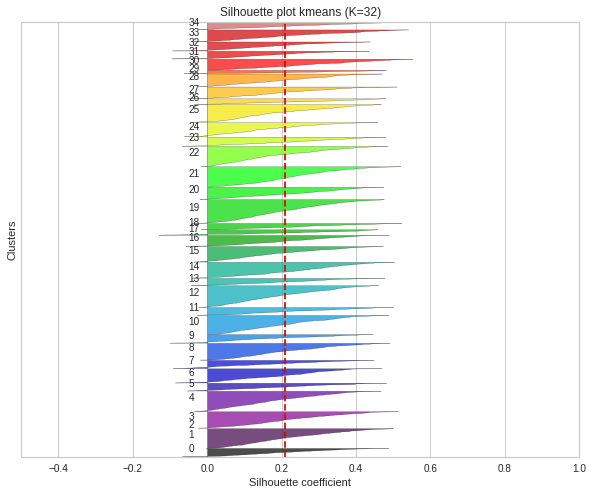

Kmeans silhouette_score 0.20855121681455505


In [23]:
kmeans = KMeans(n_clusters=35, random_state=0).fit(X_scaled)
drawSillouette(X_scaled, kmeans.labels_, "kmeans (K=32)")
print("Kmeans silhouette_score", silhouette_score(X_scaled, kmeans.labels_))


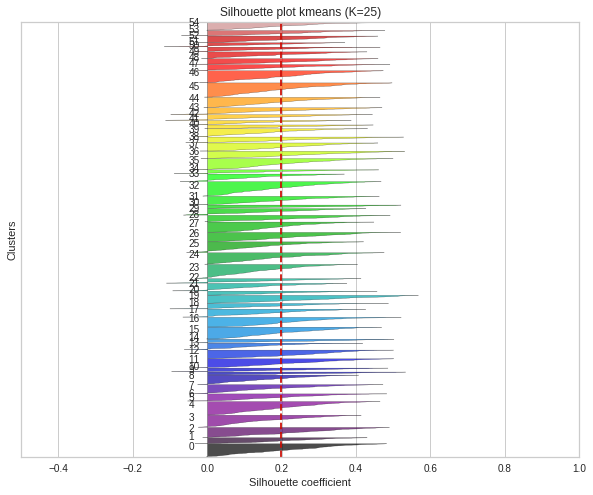

Kmeans silhouette_score 0.19940166379532057


In [24]:
kmeans = KMeans(n_clusters=55, random_state=0).fit(X_scaled)
drawSillouette(X_scaled, kmeans.labels_, "kmeans (K=25)")
print("Kmeans silhouette_score", silhouette_score(X_scaled, kmeans.labels_))

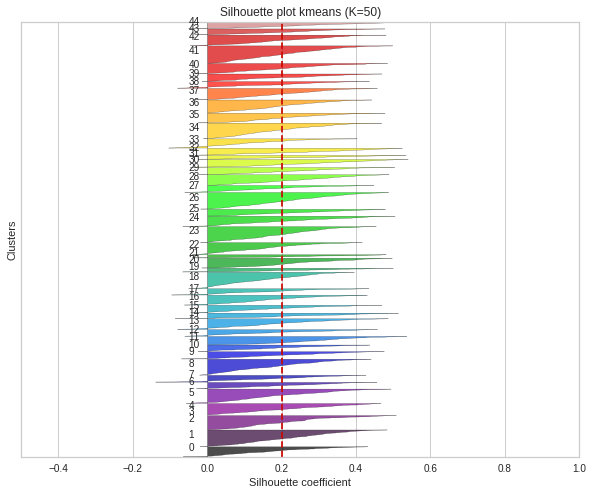

Kmeans silhouette_score 0.201888147668885


In [25]:
kmeans = KMeans(n_clusters=45, random_state=0).fit(X_scaled)
drawSillouette(X_scaled, kmeans.labels_, "kmeans (K=50)")
print("Kmeans silhouette_score", silhouette_score(X_scaled, kmeans.labels_))


## 2.

### Pré-Processamente dos dados

Foi efetuado o mesmo pré-processamento de dados realizado nas duas alíneas anteriores

In [26]:
nc = df.shape[1]
df_array = df.values
X = df_array[:, :]
y = df_array[:, 0]

feature_names = df.columns.values[:]

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
 
X_scaled

array([[ 0.87422976, -2.0740129 , -2.12744145, ..., -0.01027133,
        -0.01893096, -0.25892163],
       [ 0.88021172, -2.12031274, -2.17329974, ..., -0.01500801,
        -0.02255326, -0.44581253],
       [ 0.87542615, -2.1321845 , -2.18505827, ..., -0.02310621,
        -0.03515888, -0.03626766],
       ...,
       [ 1.26903882, -1.49704566, -1.58537302, ..., -0.00950735,
        -0.01530866,  0.46672265],
       [ 1.26784243, -1.62407343, -1.71118934, ..., -0.0032427 ,
        -0.01299038,  0.58900929],
       [ 1.26903882, -1.69411678, -1.77938883, ..., -0.0072154 ,
        -0.01588823,  0.11716746]])

### Seleção do melhor algoritmo para fazer clustering

Para este último objetivo optámos pelo algoritmo kmeans por não conhecermos muito o conjunto de dados e pelo facto de o algoritmo kmeans ser o algoritmo mais rápido e por ser adequando para conjunto de dados de grandes dimensões.

In [30]:
kms = KMeans(n_clusters=35).fit(X_scaled)

print(silhouette_score(X_scaled, kms.labels_))
print(calinski_harabasz_score(X_scaled, kms.labels_))

0.20715206010094508
107667.81765656215


In [31]:
kms = KMeans(n_clusters=45).fit(X_scaled)

print(silhouette_score(X_scaled, kms.labels_))
print(calinski_harabasz_score(X_scaled, kms.labels_))

0.20003973542318473
97178.25089320926


In [32]:
kms = KMeans(n_clusters=55).fit(X_scaled)

print(silhouette_score(X_scaled, kms.labels_))
print(calinski_harabasz_score(X_scaled, kms.labels_))

0.20050741161698102
89424.70666400291
